Since both members of the group joined together so late, we were forced to merge our codes into one. The markdown cells will explain the code and who wrote it. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

This next cell is Wenhui's and works as an inventory of tides and heights.

In [24]:

data_set = """
 1  8:07  6.57
 1 15:37 -0.39
 2  8:55  5.38
 2 16:25 -1.74
 3  9:45  5.26
 3 17:14 -1.36
 4 10:35  4.13
 4 18:00 -1.15
 5 11:28  3.48
 5 18:46 -1.61
 6 12:22  2.62
 6 19:31  0.05
 7 13:24  1.83
 7 20:16  1.01
 8  3:22  3.57
 8 21:01  0.73
 9  4:07  4.54
 9 21:46  2.17
10  4:50  3.76
10 11:58  2.88
11  5:31  3.90
11 12:56  1.92
12  6:08  4.73
12 13:45  1.74
13  6:47  5.66
13 14:25  0.79
14  7:22  5.33
14 15:00 -0.04
15  7:59  5.23
15 15:34 -1.12
16  8:34  6.67
16 16:08 -0.61
17  9:10  4.74
17 16:41 -0.93
18  9:45  4.69
18 17:12 -1.29
19 10:21  4.20
19 17:45  0.22
20 10:57  3.68
20 18:15  0.26
21 11:38  2.47
21 18:48  0.36
22 12:25  2.59
22 19:20  0.99
23  2:22  4.10
23 19:52  1.87
24  2:58  3.17
24 20:30  1.60
25  3:37  3.71
25 10:44  3.10
26  4:23  4.04
26 11:55  2.49
27  5:15  4.07
27 12:57  2.18
28  6:09  5.93
28 13:50  0.70
29  7:05  6.89
29 14:39  0.21
30  7:58  6.72
30 15:27  0.22
31  8:50  6.77
31 16:10 -1.68
32  9:40  5.77
32 16:52 -1.32
33 10:30  4.35
33 17:34 -0.73
34 11:19  4.23
34 18:12 -0.38
35 12:10  2.24
35 18:49 -0.61
36  1:32  3.45
36 19:24 -0.46
37  2:13  4.13
37 20:00  1.21
38  2:54  3.34
38  9:54  2.58
39  3:39  3.32
39 11:15  3.26
40  4:29  5.21
40 12:22  2.39
41  5:21  4.83
41 13:14  2.41
"""

The following cell is Jackson's code and works to parse the txt file. It reads the file and splits it into parts and then designates each part with a name which will be used later.

In [25]:
filename = "ASTR19_F25_group_project_data.txt"

raw_data = []

with open(filename, "r") as f:
    for line in f:
        line = line.strip()


        if not line or line.startswith("#"):
            continue

        parts = line.split()
        day = int(parts[0])
        time_str = parts[1]
        height = float(parts[2])

        raw_data.append((day, time_str, height))

print(f"Loaded {len(raw_data)} measurements.")

Loaded 82 measurements.


The following cell is Wenhui's code that acts to define the tide model and the function for the best fit line.

In [26]:
days, times, heights = [], [], []
for line in data_set.strip().splitlines():
    parts = line.split()
    day = int(parts[0])
    hour, minute = map(int, parts[1].split(':'))
    time_decimal = hour + minute/60
    height = float(parts[2])
    days.append(day)
    times.append(time_decimal)
    heights.append(height)

day = np.array(days)
times = np.array(times)
heights = np.array(heights)

t = days + times / 24.0

def tide_model(t, a0, a1, b1, a2, b2):
    omega1 = 2 * np.pi / 0.517  # ~12.4h period = 0.517 day
    omega2 = 2 * np.pi / 1.035  # ~24.8h period = 1.035 day
    return a0 + a1*np.cos(omega1*t) + b1*np.sin(omega1*t) + a2*np.cos(omega2*t) + b2*np.sin(omega2*t)

The following cell is Jackson's and works to change the time values from a hh,mm value to a continuous time value that also keeps track of the day.

In [27]:
t_list = []
h_list = []

for day, tstr, height in raw_data:
    hh, mm = map(int, tstr.split(":"))
    frac_day = (day - 1) + (hh + mm/60)/24.0

    t_list.append(frac_day)
    h_list.append(height)

t = np.array(t_list)
y = np.array(h_list)


The next cell is also Jackson's and arranges the points chronologically.

In [28]:
order = np.argsort(t)
t = t[order]
y = y[order]

The following cell is Wenhui's and creates the plot for the first graph.

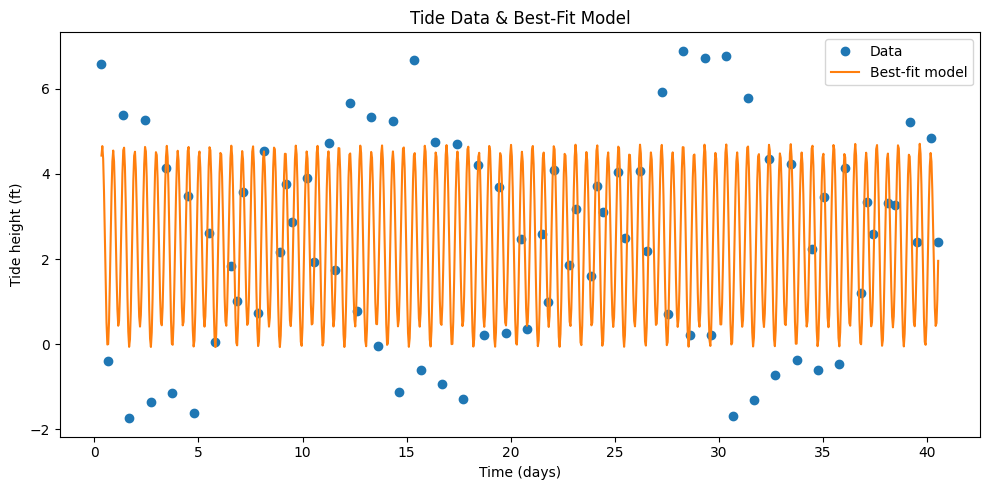

In [29]:
t_dense = np.linspace(t.min(), t.max(), 1000)
y_fit = tide_model(t_dense, *popt)

plt.figure(figsize=(10,5))
plt.plot(t, y, 'o', label="Data")
plt.plot(t_dense, y_fit, '-', label="Best-fit model")

plt.xlabel("Time (days)")
plt.ylabel("Tide height (ft)")
plt.title("Tide Data & Best-Fit Model")
plt.legend()
plt.tight_layout()

plt.savefig("tide_model_vs_data.pdf")
plt.show()


The following cell is Jackson's and calculates the residuals as well as builds the scatter plot and residual histogram. It also prints the standard deviation and intrinsic scatter.

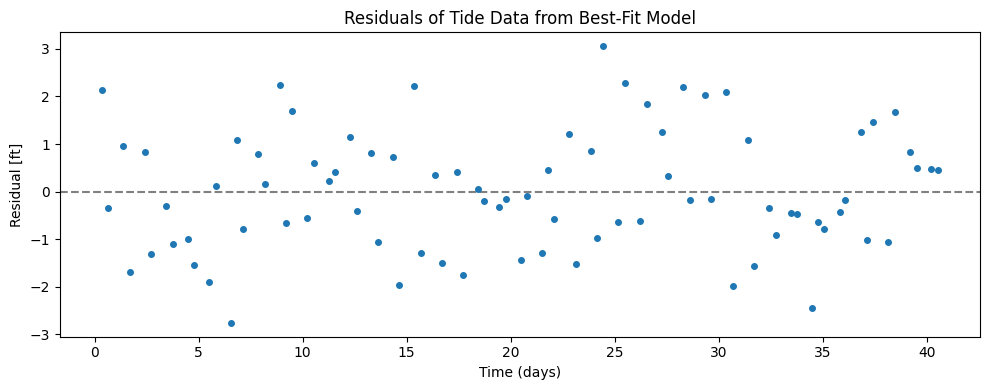

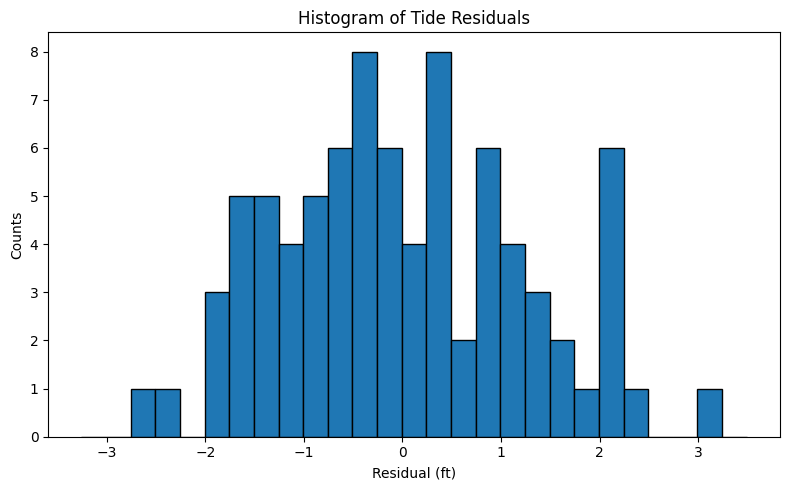

Standard deviation of residuals: 1.2559098339722499
Estimated intrinsic scatter: 1.230775979237572


In [30]:
residuals = y - tide_model(t, *popt)


plt.figure(figsize=(10,4))
plt.axhline(0, color='gray', linestyle='--')
plt.plot(t, residuals, 'o', markersize=4)

plt.xlabel("Time (days)")
plt.ylabel("Residual [ft]")
plt.title("Residuals of Tide Data from Best-Fit Model")
plt.tight_layout()
plt.savefig("tide_residuals.pdf")
plt.show()


plt.figure(figsize=(8,5))


bin_width = 0.25
bins = np.arange(residuals.min()-0.5, residuals.max()+0.5, bin_width)

plt.hist(residuals, bins=bins, edgecolor='black')

plt.xlabel("Residual (ft)")
plt.ylabel("Counts")
plt.title("Histogram of Tide Residuals")
plt.tight_layout()
plt.savefig("tide_residual_histogram.pdf")
plt.show()


std_resid = np.std(residuals, ddof=1)
print("Standard deviation of residuals:", std_resid)


measurement_err = 0.25  # ft
intrinsic_scatter = np.sqrt(max(0, std_resid**2 - measurement_err**2))
print("Estimated intrinsic scatter:", intrinsic_scatter)

The following cell is Jackson's code and creates the histogram as well as the tsunami outlier. It can be seen that the value for 2 has increased. On Jackson's original code, these graphs look slightly different because he is using a different  had m 

Tsunami deviation in units of σ: 1.59 sigma


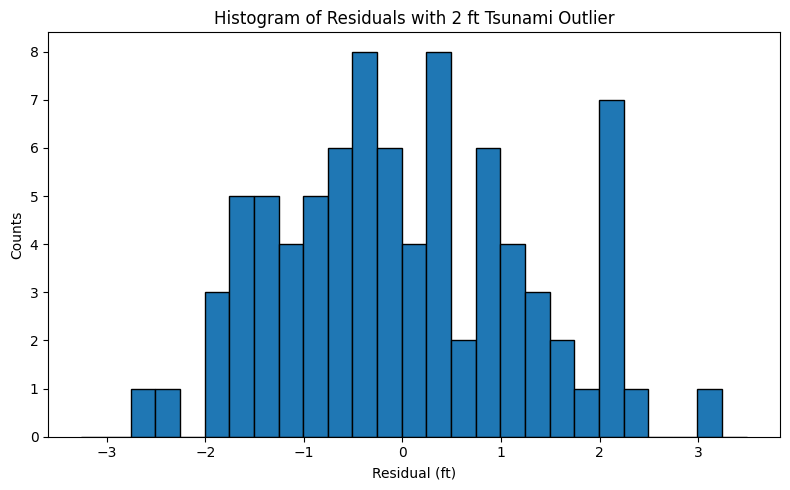

In [32]:


tsunami_value = 2.0  


sigma_units = tsunami_value / std_resid
print(f"Tsunami deviation in units of σ: {sigma_units:.2f} sigma")

residuals_with_outlier = np.append(residuals, tsunami_value)


plt.figure(figsize=(8,5))


bins = np.arange(residuals_with_outlier.min()-0.5,
                 residuals_with_outlier.max()+0.5,
                 bin_width)

plt.hist(residuals_with_outlier, bins=bins, edgecolor="black")

plt.xlabel("Residual (ft)")
plt.ylabel("Counts")
plt.title("Histogram of Residuals with 2 ft Tsunami Outlier")
plt.tight_layout()

plt.savefig("tide_residual_histogram_with_outlier.pdf")
plt.show()